# Rust Permanent Shop Effect on Steam Market Items
## Jake Berman

There is a platform called Steam for gaming where you can buy games and items for those games. Steam has a community market where players can buy and sell in game items. One of the games you can do this for is called "Rust" it is a survival game where you can get weapons and weapon skins that change the look of the weapon you are using. These weapon skins are also sold on the steam community market for sometimes a lot of money. People can usually trade or sell these skins to other players, its even used in online gambling sometimes. So, these items have real monetary value. You can purchase these items directly from the games too specifically with Rust they just released a new way to buy their items in November of 2021, however with this new shop you can no longer trade or sell any skins you buy from them. You can still trade and sell anything released before this shop. I personally have a lot of items on that game, so I wanted to see how the release of this new shop where you can no longer sell new items and skins would affect the prices of previous items. Would it increase the price decrease the price? Or if it had no correlation at all, I wanted to make sure if the prices drop I can still sell all my items before they become worthless.

All data in this project is pulled off of the steam community market public API so all prices are what other people are selling each item for within the last 15 days. Anybody can access these prices without accessing the API it would just take much longer.

In [1]:
import pandas as pd
import requests
import base64
import json
from matplotlib import pyplot as plt
import numpy as np
from numpy import ndarray as nd

In [ ]:
ls

In [3]:
item_list = pd.read_csv("/Users/jake/Documents/item_list.txt", sep = '\t', header = 0)

Below is a list of the names of all the items that will be pulled from the steam market.

In [4]:
item_list

,Item List
0,Alien Red
1,Big Grin
2,Blackout Helmet
3,Blackout Hoodie
4,Blackout Jacket
5,Blackout Kilt
6,Blackout Vest
7,Ghostly Flame
8,Glory AK47
9,Glory Rifle


In [5]:
item = [x for x in item_list['Item List']]

In [6]:
item

['Alien Red',
 'Big Grin',
 'Blackout Helmet',
 'Blackout Hoodie',
 'Blackout Jacket',
 'Blackout Kilt',
 'Blackout Vest',
 'Ghostly Flame',
 'Glory AK47',
 'Glory Rifle',
 'No Mercy Facemask',
 'No Mercy Jacket',
 'Plate Carrier - Black',
 'Rat Mask',
 'Sunrise Door',
 'Tempered Mask',
 'Training Pants']

This is the number that steams API uses to determine which game to bring information from.

In [17]:
appid = 252490

The lines below all the way down to "my_df" are getting my personal key to access steams API and then requesting access to their API and after pulling the information for all the items it puts all of the data into a data frame.

In [18]:
personal_key = pd.read_csv("/Users/jake/Documents/Steam API Key.txt", sep = '\t', header = 0)

In [19]:
secret_key = pd.read_csv("/Users/jake/Documents/SteamApi.txt", sep = '\t', header = 0)

In [20]:
secret = secret_key["Steam API"].iloc[0]

In [21]:
bearer = personal_key["Personal Key"].iloc[0]

In [22]:
header = {'Authorization' : 'Bearer {}'.format(bearer)}

In [23]:
header2 = {'Authorization' : 'Bearer {}'.format(secret)}

In [24]:
url = "https://api.steamapis.com"

In [25]:
response = requests.request("GET", url, headers = header)

In [26]:
response

<Response [200]>

In [27]:
def nextEndpoint():
    i = 0
    responsejson = ''
    df = pd.DataFrame()
    while i < len(item):
        response_item = endpoint_url = "https://api.steamapis.com/market/item/252490/{}?api_key=K20S8glp6_W4W6b0WQJ0dCveOi4".format(item[i])
        response_item = requests.request("GET", response_item, headers = header2)
        responsejson = json.loads(response_item.text)
        prices = ([x for x in responsejson['median_avg_prices_15days']])
        df[responsejson['market_name']] = prices

        i += 1
    return df

In [28]:
my_df = nextEndpoint()

In [29]:
my_df

,Alien Red,Big Grin,Blackout Helmet,Blackout Hoodie,Blackout Jacket,Blackout Kilt,Blackout Vest,Ghostly Flame,Glory AK47,Glory Rifle,No Mercy Facemask,No Mercy Jacket,Plate Carrier - Black,Rat Mask,Sunrise Door,Tempered Mask,Training Pants
0,"[Nov 29 2021, 148.91588888888887, 13]","[Nov 27 2021, 588.0205000000001, 2]","[Nov 29 2021, 8.5306, 24]","[Nov 29 2021, 14.064863636363635, 48]","[Nov 29 2021, 8.899550000000001, 42]","[Nov 29 2021, 14.270190476190479, 67]","[Nov 29 2021, 13.997058823529409, 28]","[Nov 29 2021, 11.7606, 10]","[Nov 23 2021, 277.251, 2]","[Nov 29 2021, 2.1563750000000006, 8]","[Nov 29 2021, 4.0072857142857154, 17]","[Nov 29 2021, 9.963916666666666, 14]","[Nov 28 2021, 109.994, 1]","[Nov 29 2021, 8.09825, 4]","[Nov 28 2021, 0.93, 14]","[Nov 26 2021, 202.96733333333336, 3]","[Nov 29 2021, 12.5435, 18]"
1,"[Nov 30 2021, 150.07855555555554, 11]","[Nov 28 2021, 587.62, 1]","[Nov 30 2021, 8.43876923076923, 21]","[Nov 30 2021, 13.541318181818179, 46]","[Nov 30 2021, 8.935000000000002, 35]","[Nov 30 2021, 13.957999999999998, 87]","[Nov 30 2021, 13.598333333333331, 16]","[Nov 30 2021, 11.226750000000001, 4]","[Nov 24 2021, 278.80899999999997, 3]","[Nov 30 2021, 2.1903333333333332, 3]","[Nov 30 2021, 3.866818181818182, 19]","[Nov 30 2021, 10.5846875, 29]","[Nov 29 2021, 131.118, 5]","[Nov 30 2021, 8.487, 4]","[Nov 29 2021, 1.0408571428571427, 8]","[Nov 27 2021, 204.79, 3]","[Nov 30 2021, 12.634142857142857, 20]"
2,"[Dec 01 2021, 148.11916666666667, 9]","[Nov 29 2021, 569.1046666666667, 3]","[Dec 01 2021, 8.589749999999999, 32]","[Dec 01 2021, 13.045090909090908, 57]","[Dec 01 2021, 8.75595, 50]","[Dec 01 2021, 14.67195833333333, 69]","[Dec 01 2021, 13.156058823529413, 31]","[Dec 01 2021, 12.038307692307692, 16]","[Nov 26 2021, 298.174, 2]","[Dec 01 2021, 2.20025, 9]","[Dec 01 2021, 4.0369375, 29]","[Dec 01 2021, 11.042399999999999, 24]","[Nov 30 2021, 129.535, 6]","[Dec 01 2021, 7.53675, 4]","[Nov 30 2021, 0.9875555555555555, 9]","[Nov 28 2021, 244.09, 1]","[Dec 01 2021, 12.15857142857143, 10]"
3,"[Dec 02 2021, 156.12, 13]","[Nov 30 2021, 675.36, 1]","[Dec 02 2021, 8.386812500000001, 26]","[Dec 02 2021, 13.626947368421051, 44]","[Dec 02 2021, 9.033285714285714, 43]","[Dec 02 2021, 15.82581818181818, 72]","[Dec 02 2021, 13.910611111111116, 28]","[Dec 02 2021, 12.038, 11]","[Nov 27 2021, 259.488, 1]","[Dec 02 2021, 2.2083333333333335, 7]","[Dec 02 2021, 4.2797857142857145, 23]","[Dec 02 2021, 10.636461538461539, 18]","[Dec 01 2021, 115.333, 1]","[Dec 02 2021, 8.975125, 9]","[Dec 01 2021, 0.9967142857142857, 10]","[Nov 29 2021, 244.12, 1]","[Dec 02 2021, 13.488999999999999, 15]"
4,"[Dec 03 2021, 154.88940000000002, 9]","[Dec 02 2021, 639.8747999999999, 5]","[Dec 03 2021, 9.22188888888889, 31]","[Dec 03 2021, 13.95505, 35]","[Dec 03 2021, 9.065190476190477, 61]","[Dec 03 2021, 16.117391304347827, 68]","[Dec 03 2021, 14.543117647058821, 37]","[Dec 03 2021, 11.398833333333334, 7]","[Nov 28 2021, 314.995, 2]","[Dec 03 2021, 2.12, 5]","[Dec 03 2021, 4.377000000000001, 20]","[Dec 03 2021, 11.172857142857142, 24]","[Dec 02 2021, 134.70333333333335, 3]","[Dec 03 2021, 9.123750000000001, 9]","[Dec 02 2021, 0.985, 11]","[Nov 30 2021, 242.8, 1]","[Dec 03 2021, 13.10225, 18]"
5,"[Dec 04 2021, 148.50525000000002, 15]","[Dec 04 2021, 659, 1]","[Dec 04 2021, 9.126899999999997, 28]","[Dec 04 2021, 13.30235294117647, 36]","[Dec 04 2021, 9.698809523809526, 59]","[Dec 04 2021, 16.541227272727273, 85]","[Dec 04 2021, 14.63, 34]","[Dec 04 2021, 10.891699999999998, 11]","[Nov 29 2021, 316.26, 2]","[Dec 04 2021, 2.1986666666666665, 8]","[Dec 04 2021, 4.4452, 23]","[Dec 04 2021, 12.095105263157896, 42]","[Dec 04 2021, 139.09633333333332, 6]","[Dec 04 2021, 8.293, 4]","[Dec 03 2021, 1.0075, 13]","[Dec 01 2021, 215.91, 1]","[Dec 04 2021, 12.378749999999998, 15]"
6,"[Dec 05 2021, 155.17329999999998, 11]","[Dec 05 2021, 662.49, 1]","[Dec 05 2021, 9.50565, 44]","[Dec 05 2021, 14.2163, 36]","[Dec 05 2021, 9.803818181818183, 42]","[Dec 05 2021, 16.49

The lines below are separating the date and price for each day and item and putting it into a new data frame so they information can be accessed easier.

In [30]:
new_df = pd.DataFrame()

In [31]:
new_df['date_Alien'] = [x[0] for x in my_df['Alien Red']]

In [32]:
new_df['price_Alien'] = [x[1] for x in my_df['Alien Red']]

In [33]:
new_df['date_BigGrin'] = [x[0] for x in my_df['Big Grin']]

In [34]:
new_df['price_BigGrin'] = [x[1] for x in my_df['Big Grin']]

In [35]:
new_df['date_BlackoutHelmet'] = [x[0] for x in my_df['Blackout Helmet']]

In [36]:
new_df['price_BlackoutHelmet'] = [x[1] for x in my_df['Blackout Helmet']]

In [37]:
new_df['date_BlackoutHoodie'] = [x[0] for x in my_df['Blackout Hoodie']]

In [38]:
new_df['price_BlackoutHoodie'] = [x[1] for x in my_df['Blackout Hoodie']]

In [39]:
new_df['date_BlackoutJacket'] = [x[0] for x in my_df['Blackout Jacket']]

In [40]:
new_df['price_BlackoutJacket'] = [x[1] for x in my_df['Blackout Jacket']]

In [41]:
new_df['date_BlackoutKilt'] = [x[0] for x in my_df['Blackout Kilt']]

In [42]:
new_df['price_BlackoutKilt'] = [x[1] for x in my_df['Blackout Kilt']]

In [43]:
new_df['date_BlackoutVest'] = [x[0] for x in my_df['Blackout Vest']]

In [44]:
new_df['price_BlackoutVest'] = [x[1] for x in my_df['Blackout Vest']]

In [45]:
new_df['date_GhostlyFlame'] = [x[0] for x in my_df['Ghostly Flame']]

In [46]:
new_df['price_GhostlyFlame'] = [x[1] for x in my_df['Ghostly Flame']]

In [47]:
new_df['date_GloryAK'] = [x[0] for x in my_df['Glory AK47']]

In [48]:
new_df['price_GloryAK'] = [x[1] for x in my_df['Glory AK47']]

In [49]:
new_df['date_GloryRifle'] = [x[0] for x in my_df['Glory Rifle']]

In [50]:
new_df['price_GloryRifle'] = [x[1] for x in my_df['Glory Rifle']]

In [51]:
new_df['date_NoMercyFaceMask'] = [x[0] for x in my_df['No Mercy Facemask']]

In [52]:
new_df['price_NoMercyFaceMask'] = [x[1] for x in my_df['No Mercy Facemask']]

In [53]:
new_df['date_NoMercyJacket'] = [x[0] for x in my_df['No Mercy Jacket']]

In [54]:
new_df['price_NoMercyJacket'] = [x[1] for x in my_df['No Mercy Jacket']]

In [55]:
new_df['date_PlateCarrier'] = [x[0] for x in my_df['Plate Carrier - Black']]

In [56]:
new_df['price_PlateCarrier'] = [x[1] for x in my_df['Plate Carrier - Black']]

In [57]:
new_df['date_RatMask'] = [x[0] for x in my_df['Rat Mask']]

In [58]:
new_df['price_RatMask'] = [x[1] for x in my_df['Rat Mask']]

In [59]:
new_df['date_SunriseDoor'] = [x[0] for x in my_df['Sunrise Door']]

In [60]:
new_df['price_SunriseDoor'] = [x[1] for x in my_df['Sunrise Door']]

In [61]:
new_df['date_TemperedMask'] = [x[0] for x in my_df['Tempered Mask']]

In [62]:
new_df['price_TemperedMask'] = [x[1] for x in my_df['Tempered Mask']]

In [63]:
new_df['date_TrainingPants'] = [x[0] for x in my_df['Training Pants']]

In [64]:
new_df['price_TrainingPants'] = [x[1] for x in my_df['Training Pants']]

This new data frame now has all the dates and prices listed separately so each data point can be called.

In [65]:
new_df 

,date_Alien,price_Alien,date_BigGrin,price_BigGrin,date_BlackoutHelmet,price_BlackoutHelmet,date_BlackoutHoodie,price_BlackoutHoodie,date_BlackoutJacket,price_BlackoutJacket,...,date_PlateCarrier,price_PlateCarrier,date_RatMask,price_RatMask,date_SunriseDoor,price_SunriseDoor,date_TemperedMask,price_TemperedMask,date_TrainingPants,price_TrainingPants
0,Nov 29 2021,148.915889,Nov 27 2021,588.020500,Nov 29 2021,8.530600,Nov 29 2021,14.064864,Nov 29 2021,8.899550,...,Nov 28 2021,109.994000,Nov 29 2021,8.098250,Nov 28 2021,0.930000,Nov 26 2021,202.967333,Nov 29 2021,12.543500
1,Nov 30 2021,150.078556,Nov 28 2021,587.620000,Nov 30 2021,8.438769,Nov 30 2021,13.541318,Nov 30 2021,8.935000,...,Nov 29 2021,131.118000,Nov 30 2021,8.487000,Nov 29 2021,1.040857,Nov 27 2021,204.790000,Nov 30 2021,12.634143
2,Dec 01 2021,148.119167,Nov 29 2021,569.104667,Dec 01 2021,8.589750,Dec 01 2021,13.045091,Dec 01 2021,8.755950,...,Nov 30 2021,129.535000,Dec 01 2021,7.536750,Nov 30 2021,0.987556,Nov 28 2021,244.090000,Dec 01 2021,12.158571
3,Dec 02 2021,156.120000,Nov 30 2021,675.360000,Dec 02 2021,8.386813,Dec 02 2021,13.626947,Dec 02 2021,9.033286,...,Dec 01 2021,115.333000,Dec 02 2021,8.975125,Dec 01 2021,0.996714,Nov 29 2021,244.120000,Dec 02 2021,13.489000
4,Dec 03 2021,154.889400,Dec 02 2021,639.874800,Dec 03 2021,9.221889,Dec 03 2021,13.955050,Dec 03 2021,9.065190,...,Dec 02 2021,134.703333,Dec 03 2021,9.123750,Dec 02 2021,0.985000,Nov 30 2021,242.800000,Dec 03 2021,13.102250
5,Dec 04 2021,148.505250,Dec 04 2021,659.000000,Dec 04 2021,9.126900,Dec 04 2021,13.302353,Dec 04 2021,9.698810,...,Dec 04 2021,139.096333,Dec 04 2021,8.293000,Dec 03 2021,1.007500,Dec 01 2021,215.910000,Dec 04 2021,12.378750
6,Dec 05 2021,155.173300,Dec 05 2021,662.490000,Dec 05 2021,9.505650,Dec 05 2021,14.216300,Dec 05 2021,9.803818,...,Dec 05 2021,125.801500,Dec 05 2021,8.696143,Dec 04 2021,1.091600,Dec 02 2021,214.386500,Dec 05 2021,13.027429
7,Dec 06 2021,158.892500,Dec 06 2021,604.753000,Dec 06 2021,9.292500,Dec 06 2021,14.793778,Dec 06 2021,10.254714,...,Dec 06 2021,131.344000,Dec 06 2021,8.188571,Dec 05 2021,1.140714,Dec 03 2021,219.920000,Dec 06 2021,11.394000
8,Dec 07 2021,153.106800,Dec 07 2021,661.247000,Dec 07 2021,9.217562,Dec 07 2021,14.364133,Dec 07 2021,9.680048,...,Dec 07 2021,124.173500,Dec 07 2021,8.036333,Dec 06 2021,0.969000,Dec 04 2021,247.510000,Dec 07 2021,12.175333
9,Dec 08 2021,157.871500,Dec 08 2021,673.819000,Dec 08 2021,9.138067,Dec 08 2021,13.425667,Dec 08 2021,10.017444,...,Dec 08 2021,139.715000,Dec 08 2021,8.327333,Dec 07 2021,1.008500,Dec 05 2021,249.980000,Dec 08 2021,12.156917


In [66]:
namesList = 'date_Alien', 'date_BigGrin','date_BlackoutHelmet','date_BlackoutHoodie','date_BlackoutJacket','date_BlackoutKilt','date_BlackoutVest','date_GhostlyFlame','date_GloryAK','date_GloryRifle','date_NoMercyFaceMask','date_NoMercyJacket','date_PlateCarrier','date_RatMask','date_SunriseDoor','date_TemperedMask','date_TrainingPants'

In [67]:
namesList

('date_Alien',
 'date_BigGrin',
 'date_BlackoutHelmet',
 'date_BlackoutHoodie',
 'date_BlackoutJacket',
 'date_BlackoutKilt',
 'date_BlackoutVest',
 'date_GhostlyFlame',
 'date_GloryAK',
 'date_GloryRifle',
 'date_NoMercyFaceMask',
 'date_NoMercyJacket',
 'date_PlateCarrier',
 'date_RatMask',
 'date_SunriseDoor',
 'date_TemperedMask',
 'date_TrainingPants')

In [68]:
priceList = 'price_Alien', 'price_BigGrin','price_BlackoutHelmet','price_BlackoutHoodie','price_BlackoutJacket','price_BlackoutKilt','price_BlackoutVest','price_GhostlyFlame','price_GloryAK','price_GloryRifle','price_NoMercyFaceMask','price_NoMercyJacket','price_PlateCarrier','price_RatMask','price_SunriseDoor','price_TemperedMask','price_TrainingPants'

In [69]:
priceList

('price_Alien',
 'price_BigGrin',
 'price_BlackoutHelmet',
 'price_BlackoutHoodie',
 'price_BlackoutJacket',
 'price_BlackoutKilt',
 'price_BlackoutVest',
 'price_GhostlyFlame',
 'price_GloryAK',
 'price_GloryRifle',
 'price_NoMercyFaceMask',
 'price_NoMercyJacket',
 'price_PlateCarrier',
 'price_RatMask',
 'price_SunriseDoor',
 'price_TemperedMask',
 'price_TrainingPants')

The two lists above were made so the while loop below can go through all of the data without having to type out 17 different graphs.

The loop then takes the variables names from the list and puts it into different scatterplots.

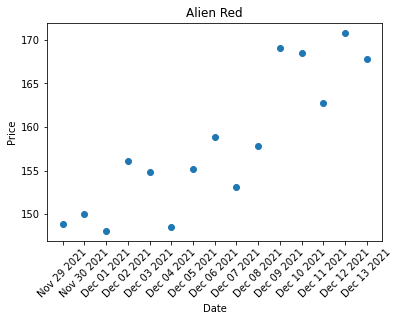

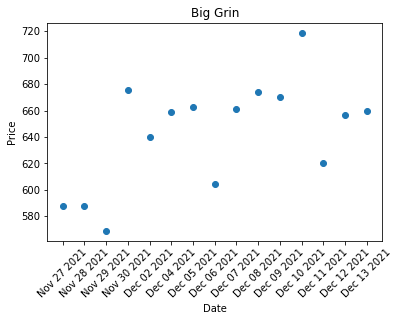

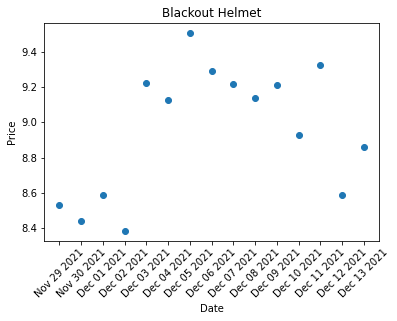

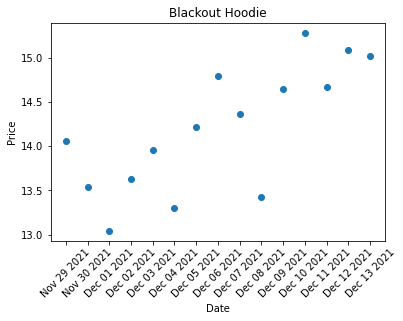

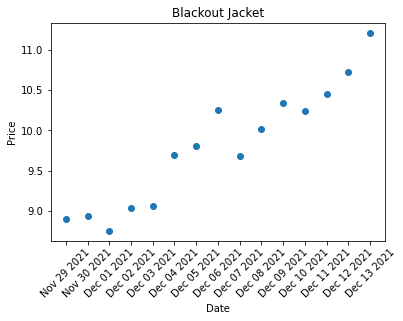

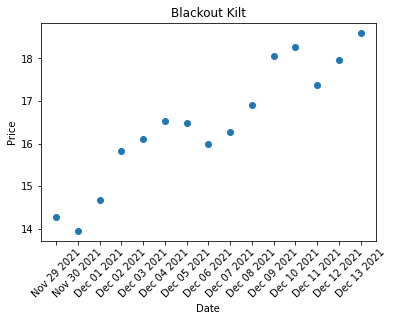

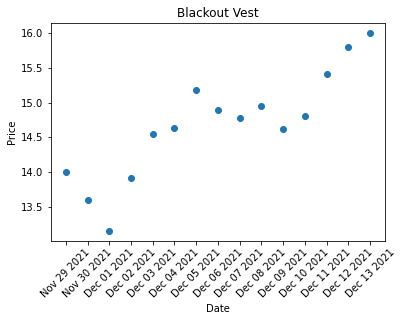

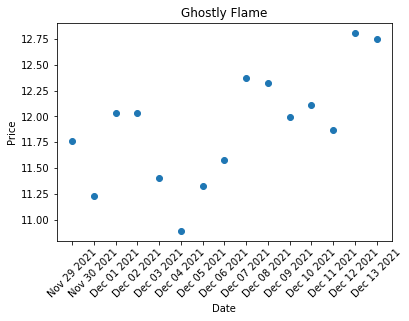

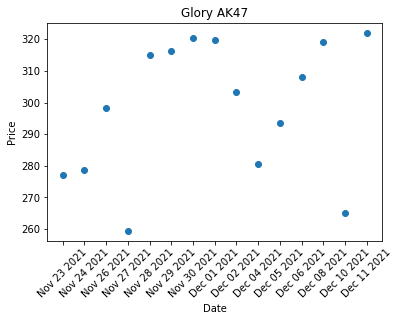

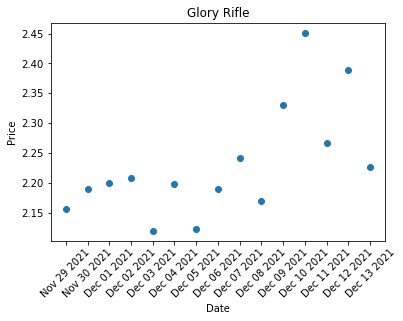

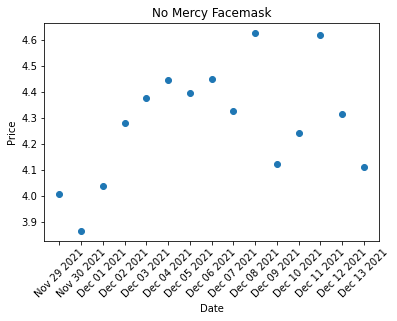

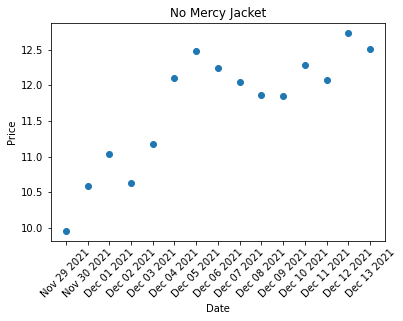

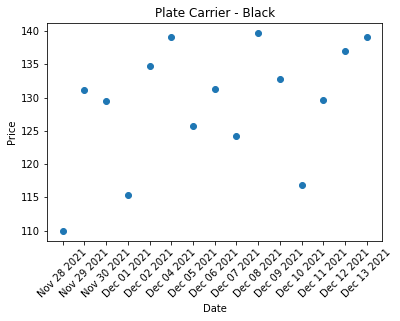

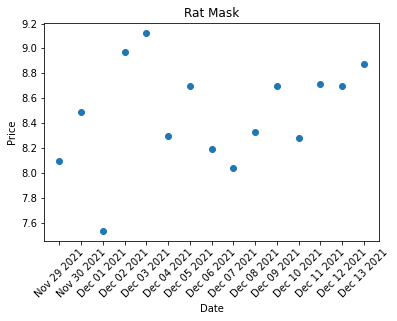

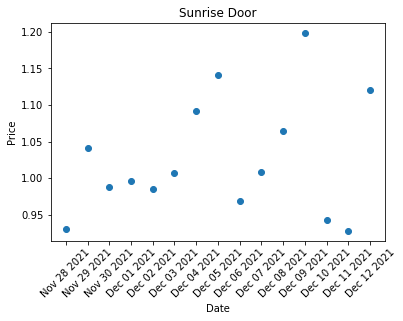

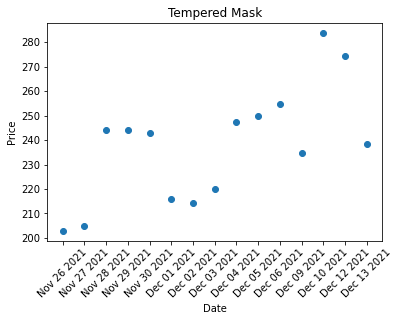

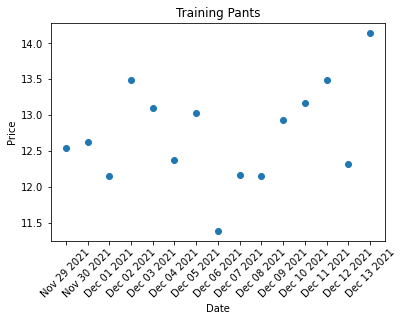

In [91]:
i = 0
while i < len(namesList):
    fig0, ax0 = plt.subplots()
    ax0.scatter(new_df[namesList[i]], new_df[priceList[i]])
    plt.title(item[i])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()
    i += 1

The data initially came with date, price, and quantity however, I took out quantity to make it easier to show how the prices were affected over 15 days. The only problem with not having quantity is sometimes there is only 1 or 2 of an item on the market at a certain point which can inflate the prices of items because people can mark whatever price they want to sell it for. There is probably another way I could of made all the graphs so it also accounts for quantity, or even made another set to see how much the prices jumped when an item had low quantity on the market.

This data is all pulled directly from the Steam market place, where all items and prices on it are determined by people wanting to buy and sell. This data is visible from steam in general so it can be looked at without accessing API. Also, since all the prices are determined by people it can be considered pretty reliable data because all it is doing is taking prices items were sold at and bringing it here.

Based on all of the scatter plots it does not look like the new shop that Rust added has dropped the prices of the items so far. Based on the data it looks like they either increased or didn't have a correlation at all. Overall it looks like the new shop didn't have a negative effect on prices for previous items.

There are a few limitations with this data, for starters the dates are the last 15 days since the code was executed, so the longer its been since the shop was released (mid November) the less reliable the data becomes. There is also the fact that since some items may look like it correlates and some don't it can't be said with 100% certainty that the new shop had an effect on the prices of the old items.

The main takeaway from this data is that the new shop didn't effect prices in a negative way, also that it is very likely that the shop didn't effect prices significantly at all.